# ETL DETRAN

In [2]:
#Instalação de Bibliotecas
#%pip install pandas  -q
#%pip install matplotlib -q
#%pip install seaborn -q
%pip install scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import r2_score,accuracy_score


In [34]:
#Libera visualização de máximo de Colunas e Linhas
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#Desativa mensagens de erros
warnings.filterwarnings('ignore')

#Configura para flot duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [35]:
#Carregando CSV
df_original = pd.read_csv('dados/acidentes2024_todas_causas_tipos.csv',encoding='Windows-1252',sep=';')

In [36]:
#cebecalho, retornar 5 primeiras linhas
df_original.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.00,1268971.00,2024-01-01,segunda-feira,00:05:00,RJ,101.00,"272,5",TANGUA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.00,Motocicleta,HONDA/CG 160 FAN,2023.00,Condutor,Óbito,26.00,Masculino,0.00,0.00,0.00,1.00,-22.73,-42.70,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.00,1268985.00,2024-01-01,segunda-feira,00:05:00,GO,153.00,"424,6",ANAPOLIS,Não,Animais na Pista,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.00,Automóvel,VW/GOL 1.6 POWER,2009.00,Condutor,Ileso,34.00,Feminino,1.00,0.00,0.00,0.00,-16.23,-49.01,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.00,1268985.00,2024-01-01,segunda-feira,00:05:00,GO,153.00,"424,6",ANAPOLIS,Sim,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.00,Automóvel,VW/GOL 1.6 POWER,2009.00,Condutor,Ileso,34.00,Feminino,1.00,0.00,0.00,0.00,-16.23,-49.01,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.00,1269020.00,2024-01-01,segunda-feira,01:45:00,ES,101.00,"264,1",SERRA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.00,Caminhonete,VW/SAVEIRO 1.6,2009.00,Condutor,Ileso,55.00,Masculino,1.00,0.00,0.00,0.00,-20.17,-40.27,SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.00,1269028.00,2024-01-01,segunda-feira,00:45:00,SC,101.00,110,PENHA,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.00,Camioneta,I/SSANGYONG ACTYON A23 4,2011.00,Condutor,Ileso,53.00,Masculino,1.00,0.00,0.00,0.00,-26.83,-48.71,SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [8]:
#verifica as dimensões do arquivo (linhas, colunas)
df_original.shape

(603215, 37)

In [37]:
#verifica informacoes do arquivo
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603215 entries, 0 to 603214
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      603215 non-null  float64
 1   pesid                   545574 non-null  float64
 2   data_inversa            603215 non-null  object 
 3   dia_semana              603215 non-null  object 
 4   horario                 603215 non-null  object 
 5   uf                      603215 non-null  object 
 6   br                      601867 non-null  float64
 7   km                      601867 non-null  object 
 8   municipio               603215 non-null  object 
 9   causa_principal         603215 non-null  object 
 10  causa_acidente          603215 non-null  object 
 11  ordem_tipo_acidente     603215 non-null  int64  
 12  tipo_acidente           603215 non-null  object 
 13  classificacao_acidente  603212 non-null  object 
 14  fase_dia            

In [10]:
df_original.isnull().sum()

id                             0
pesid                      57641
data_inversa                   0
dia_semana                     0
horario                        0
uf                             0
br                          1348
km                          1348
municipio                      0
causa_principal                0
causa_acidente                 0
ordem_tipo_acidente            0
tipo_acidente                  0
classificacao_acidente         3
fase_dia                       0
sentido_via                    0
condicao_metereologica         0
tipo_pista                     0
tracado_via                    0
uso_solo                       0
id_veiculo                 19572
tipo_veiculo               19572
marca                          0
ano_fabricacao_veiculo     19572
tipo_envolvido             57641
estado_fisico              57641
idade                     109408
sexo                       57641
ilesos                     57641
feridos_leves              57641
feridos_gr

In [11]:
#Verificando um valor especifico de pesid
df_original.loc[df_original['pesid'] == 1268971.00]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.00,1268971.00,2024-01-01,segunda-feira,00:05:00,RJ,101.00,"272,5",TANGUA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.00,Motocicleta,HONDA/CG 160 FAN,2023.00,Condutor,Óbito,26.00,Masculino,0.00,0.00,0.00,1.00,-22.73,-42.70,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ


In [12]:
#Troca os valores NaN dentro de pesid por 0.0
df_original['pesid'] = df_original['pesid'].fillna(0.0)

In [39]:
df_original.isnull().sum()

id                             0
pesid                      57641
data_inversa                   0
dia_semana                     0
horario                        0
uf                             0
br                          1348
km                          1348
municipio                      0
causa_principal                0
causa_acidente                 0
ordem_tipo_acidente            0
tipo_acidente                  0
classificacao_acidente         3
fase_dia                       0
sentido_via                    0
condicao_metereologica         0
tipo_pista                     0
tracado_via                    0
uso_solo                       0
id_veiculo                 19572
tipo_veiculo               19572
marca                          0
ano_fabricacao_veiculo     19572
tipo_envolvido             57641
estado_fisico              57641
idade                     109408
sexo                       57641
ilesos                     57641
feridos_leves              57641
feridos_gr

In [14]:
#pega mediana
df_original['br'].median() #r: 163.0
#pesquisa 
df_original.loc[df_original['br'] == 0.0]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop


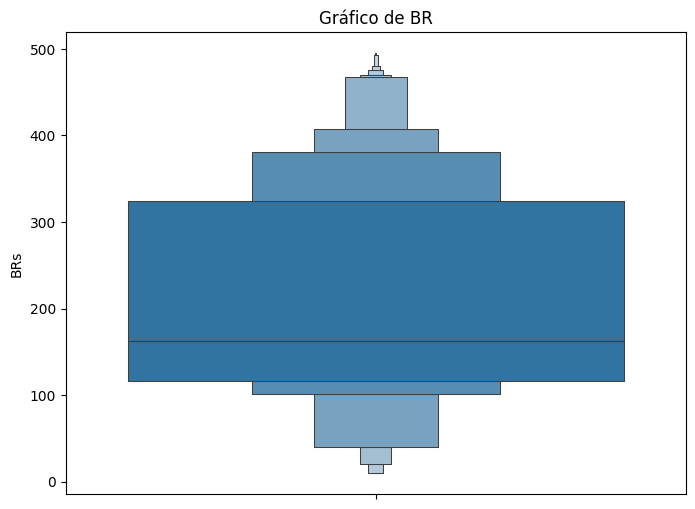

In [ ]:
#Plotando Gráfico de BR
plt.figure(figsize=(8,6)) #tamanho da figura (imagem)
sns.boxenplot(data=df_original,y='br') #selecionando a base (df_original) e especificando o campo y= 'br'
plt.title('Gráfico de BR') #título do gráfico
plt.ylabel('BRs') #Título da posição Y do gráfico
plt.show() #mostra o gráfico

In [15]:
#Tratando de conveter o campo km para Float
# Certificando que a coluna KM é do tipo string (object) antes de substituir
df_original['km'] = df_original['km'].astype(str)

In [16]:
# 1. Substituir a vírgula (,) por ponto (.)
df_original['km'] = df_original['km'].str.replace(',', '.', regex=False)


In [17]:
# 2. Converter a coluna para float64
df_original['km'] = df_original['km'].astype(float)
#OBS os dados nulos ainda existem
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603215 entries, 0 to 603214
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      603215 non-null  float64
 1   pesid                   603215 non-null  float64
 2   data_inversa            603215 non-null  object 
 3   dia_semana              603215 non-null  object 
 4   horario                 603215 non-null  object 
 5   uf                      603215 non-null  object 
 6   br                      601867 non-null  float64
 7   km                      601867 non-null  float64
 8   municipio               603215 non-null  object 
 9   causa_principal         603215 non-null  object 
 10  causa_acidente          603215 non-null  object 
 11  ordem_tipo_acidente     603215 non-null  int64  
 12  tipo_acidente           603215 non-null  object 
 13  classificacao_acidente  603212 non-null  object 
 14  fase_dia            

In [18]:
df_original.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.00,1268971.00,2024-01-01,segunda-feira,00:05:00,RJ,101.00,272.50,TANGUA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.00,Motocicleta,HONDA/CG 160 FAN,2023.00,Condutor,Óbito,26.00,Masculino,0.00,0.00,0.00,1.00,-22.73,-42.70,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.00,1268985.00,2024-01-01,segunda-feira,00:05:00,GO,153.00,424.60,ANAPOLIS,Não,Animais na Pista,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.00,Automóvel,VW/GOL 1.6 POWER,2009.00,Condutor,Ileso,34.00,Feminino,1.00,0.00,0.00,0.00,-16.23,-49.01,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.00,1268985.00,2024-01-01,segunda-feira,00:05:00,GO,153.00,424.60,ANAPOLIS,Sim,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.00,Automóvel,VW/GOL 1.6 POWER,2009.00,Condutor,Ileso,34.00,Feminino,1.00,0.00,0.00,0.00,-16.23,-49.01,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.00,1269020.00,2024-01-01,segunda-feira,01:45:00,ES,101.00,264.10,SERRA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.00,Caminhonete,VW/SAVEIRO 1.6,2009.00,Condutor,Ileso,55.00,Masculino,1.00,0.00,0.00,0.00,-20.17,-40.27,SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.00,1269028.00,2024-01-01,segunda-feira,00:45:00,SC,101.00,110.00,PENHA,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.00,Camioneta,I/SSANGYONG ACTYON A23 4,2011.00,Condutor,Ileso,53.00,Masculino,1.00,0.00,0.00,0.00,-26.83,-48.71,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
5,571778.00,1269045.00,2024-01-01,segunda-feira,00:45:00,SC,101.00,110.00,PENHA,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.00,Camioneta,I/SSANGYONG ACTYON A23 4,2011.00,Passageiro,Lesões Leves,33.00,Feminino,0.00,1.00,0.00,0.00,-26.83,-48.71,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
6,571778.00,1269028.00,2024-01-01,segunda-feira,00:45:00,SC,101.00,110.00,PENHA,Sim,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.00,Camioneta,I/SSANGYONG ACTYON A23 4,2011.00,Condutor,Ileso,53.00,Masculino,1.00,0.00,0.00,0.00,-26.83,-48.71,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
7,571778.00,1269045.00,2024-01-01,segunda-feira,00:45:00,SC,101.00,110.00,PENHA,Sim,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.00,Camioneta,I/SSANGYONG ACTYON A23 4,2011.00,Passageiro,Lesões Leves,33.00,Feminino,0.00,1.00,0.00,0.00,-26.83,-48.71,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
8,571779.00,1268998.00,2024-01-01,segunda-feira,01:45:00,RS,116.00,236.00,NOVO HAMBURGO,Sim,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.00,Automóvel,FIAT/PALIO FIRE ECONOMY,2010.00,Passageiro,Ileso,6.00,Feminino,1.00,0.00,0.00,0.00,-29.67,-51.14,SPRF-RS,DEL01-RS,UOP02-DEL01-RS
9,571779.00,1268999.00,2024-01-01,segunda-feira,01:45:00,RS,116.00,236.00,NOVO HAMBURGO,Sim,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.00,Automóvel,FIAT/PALIO FIRE ECONOMY,2010.00,Passageiro,Ileso,9.00,Masculino,1.00,0.00,0.00,0.00,-29.67,-51.14,SPRF-RS,DEL01-RS,UOP02-DEL01-RS


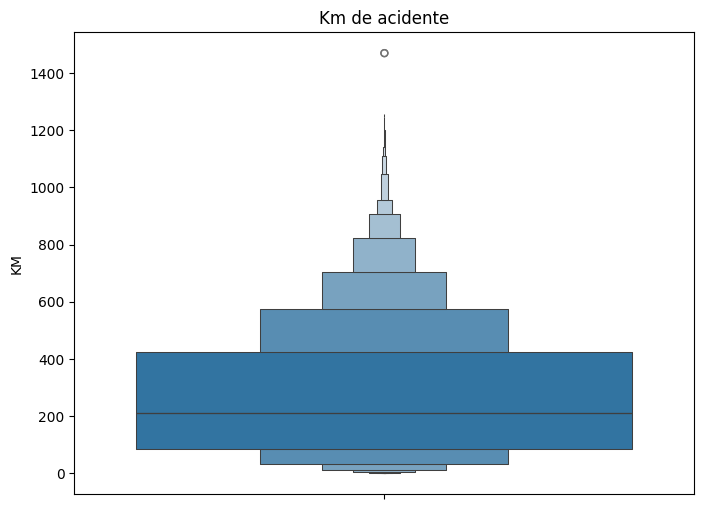

In [19]:
plt.figure(figsize=(8,6))
sns.boxenplot(data=df_original,y='km')
plt.title('Km de acidente')
plt.ylabel('KM')
plt.show()

In [ ]:
df_original.loc[df_original['km'] > 1400.00]

In [21]:
df_original['km'].median()

np.float64(210.3)

In [22]:
df_original.groupby(['sexo']).size()

sexo
Feminino         131596
Ignorado           1280
Masculino        377002
Não Informado     35696
dtype: int64

<Axes: title={'center': 'Sexo'}, xlabel='sexo'>

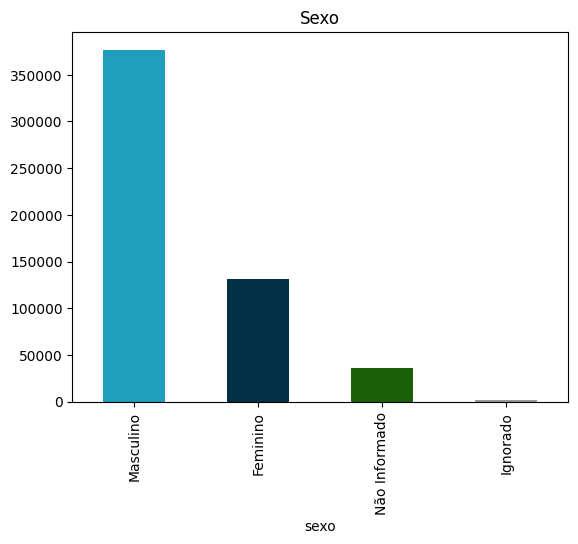

In [24]:
df_original.sexo.value_counts().plot(kind='bar',title='Sexo',color=['#219ebc','#023047','#196009','#999999'])

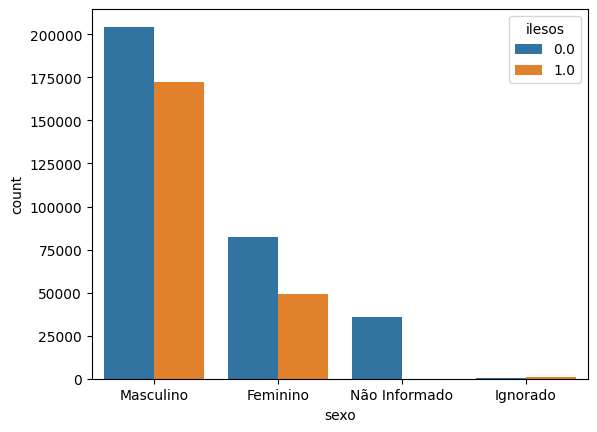

In [27]:
sns.countplot(data=df_original,x='sexo',hue='ilesos')
plt.show()

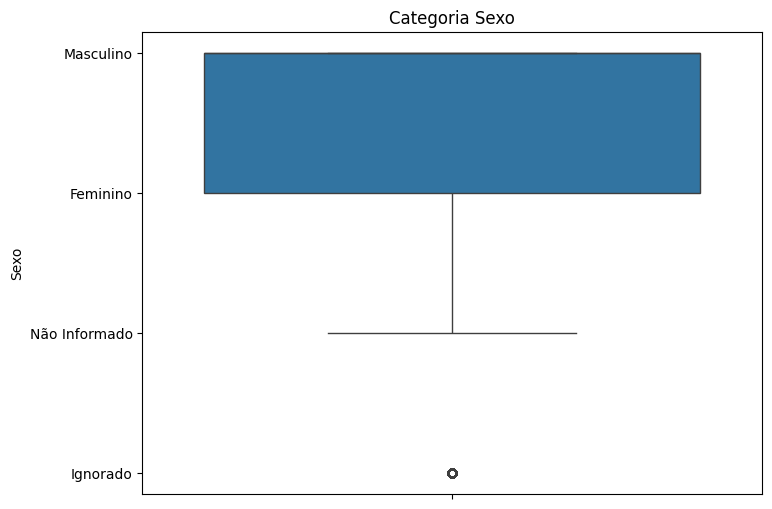

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_original,y='sexo')
plt.title('Categoria Sexo')
plt.ylabel('Sexo')
plt.show()

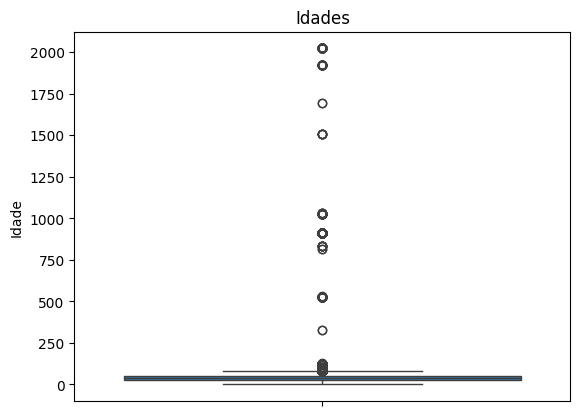

In [41]:
sns.boxplot(data=df_original,y='idade')
plt.title('Idades')
plt.ylabel('Idade')
plt.show()

In [ ]:
df_original.loc[df_original['idade'] > 100.00].size

0

In [52]:
df_original['idade'].size

603215

In [55]:
df_original['idade'].median()

np.float64(38.0)

In [56]:
df_original.loc[df_original['idade'] > 100,'idade'] = df_original['idade'].median()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
321539,616136.00,1377823.00,2024-07-22,segunda-feira,09:20:00,BA,116.00,"18,5",VITORIA DA CONQUISTA,Sim,Conversão proibida,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Reta,Sim,1103243.00,Automóvel,CHEVROLET/CELTA 1.0L LT,2012.00,Passageiro,Lesões Graves,99.00,Feminino,0.00,0.00,1.00,0.00,-14.90,-40.83,SPRF-BA,DEL08-BA,UOP01-DEL08-BA
